---

<br><br>

<center>

## DataFrame

</center>

<br>

It is 2-dimensional **heterogeneous,** **mutable** data structure. It is fundamentally different from NumPy 2D arrays in the sense that here each column can be a different `dtype`. 

- Has both a **row and column index** for
  - Fast lookups
  - Data alignment and joins

- Is operationally identical tothe R *data.frame* 

- Can contain **columns of different data types** 

- Can be thought of a dictionary of Series objects. 

- Has a number of associated methods that make data wrangling tasks and basic statisitical analysis very straightforward

<br>

---
## Creating a DataFrame

One of the most common ways of creating a dataframe is from a dictionary of arrays or lists or from NumPy 2D arrays. 

Here's the syntax,

```python
DataFrame(data=, index=, columns=)
```

As was the case with Series, if the `index` and the `columns` parameters are not specified, default numeric sequences running from 0 to N-1 will be used

<br>

---
### From a 2D Array

First we create a DataFrame using all defaults, and then another where we pass index and column labels.

```python
# DataFrame with default index and column labels
In [152]: df_1 = DataFrame(np.arange(20, 32).reshape(3, 4))

In [153]: df_1
Out[153]: 
    0   1   2   3
0  20  21  22  23
1  24  25  26  27
2  28  29  30  31
 
# DataFrame with explicit index and column labels
In [155]: df_2 = DataFrame(data = np.arange(20, 32).reshape(3, 4), 
                           columns = list('WXYZ'), 
                           index = list('ABC'))
In [156]: df_2
Out[156]: 
    W   X   Y   Z
A  20  21  22  23
B  24  25  26  27
C  28  29  30  31
```

<br>

---
### Using a Dict of equal length Lists

The keys of the dictionary will be used as column names, the values will form the data in the table. We can optionally provide a list of strings to be used as the index labels.


```python
In [157]: dict_1 = {'ints': np.arange(5),
                    'floats': np.arange(0.1, 0.6, 0.1),
                    'strings': list('abcde')}

In [158]: df3 = DataFrame(dict_1, index=list('vwxyz'))
    
In [159]: df3
Out[159]: 
   floats  ints strings
v     0.1     0       a
w     0.2     1       b
x     0.3     2       c
y     0.4     3       d
z     0.5     4       e    
```

Let's practice:

<br>

<br>

---
## DataFrame Attributes

Some of the most commonly used ones are – `index, columns, dtypes, shape, info`

```python
# Get row labels
In [161]: df3.index
Out[161]: Index([u'v', u'w', u'x', u'y', u'z'], dtype='object')

# Get column labels
In [162]: df3.columns
Out[162]: Index([u'floats', u'ints', u'strings'], dtype='object')

    
# Get number of rows, columns
In [164]: df3.shape
Out[164]: (5, 3)
    
# Get overview of the dataset
In [165]: df3.info()
Index: 5 entries, v to z
Data columns (total 3 columns):
floats     5 non-null float64
ints       5 non-null int64
strings    5 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 160.0+ bytes
```

<br>

<br>

---
## Subsetting DataFrames

Pandas allows us to subset DataFrames in a variety of ways to extract from a given dataset 

* a value
* a row or a column (returns a Series)
* multiple rows/columns (returns a subset of the DataFrame )

Let's look at a few examples of these

<br>

---
### Selecting a single Row/Column

For a DataFrame, basic indexing selects the columns.  An individual column can be retrieved as a Series using (a) the square bracket accessor (b) the dot accessor, or (c) one of the accessors - `loc, iloc, ix` etc.

**Syntax**

```python
df['column_name']
df.column_name

df.loc[:, 'column_name']

df.iloc[:, column_number]
```

**Examples**

```python
# The DataFrame
In [169]: df3
Out[169]: 
   floats  ints strings
v     0.1     0       a
w     0.2     1       b
x     0.3     2       c
y     0.4     3       d
z     0.5     4       e

# Using a column label with the square bracket accessor
In [170]: df3['floats']
Out[170]: 
v    0.1
w    0.2
x    0.3
y    0.4
z    0.5
Name: floats, dtype: float64

# Using a column label with the dot accessor
In [171]: df3.ints
Out[171]: 
v    0
w    1
x    2
y    3
z    4
Name: ints, dtype: int64

# Using .loc and a column label
In [172]: df3.loc[:, 'strings']
Out[172]: 
v    a
w    b
x    c
y    d
z    e
Name: strings, dtype: object

# Using .iloc and a column position      
In [173]: df3.iloc[:, 0]
Out[173]: 
v    0.1
w    0.2
x    0.3
y    0.4
z    0.5
Name: floats, dtype: float64
        
# Using .loc and a row label        
In [174]: df3.loc['v']
Out[174]: 
floats     0.1
ints         0
strings      a
Name: v, dtype: object

# Using .iloc and a row position        
In [175]: df3.iloc[3]
Out[175]: 
floats     0.4
ints         3
strings      d
Name: y, dtype: object        
```
<br>

---
### Selecting 2 or more rows/columns

This can be accomplished by

* passing a list of column labels to the double square bracket accessor like `[[list-of-columns]]`
* passing a list or slice of row/column labels/positions to `loc, iloc`
* passing a boolean series to `loc, iloc` for selecting particular rows/columns

Each time we subset 2 or more rows/columns from a DataFrame, the result will be a DataFrame.

**Syntax** for `loc, iloc`

```python
# loc is label based
df.loc[list_or_slice_of_row_labels, list_or_slice_of_column_labels]
df.loc[boolean_for_rows, boolean_for_columns]

# iloc is integer based
df.iloc[row_positions, column_positions]

```

**Examples**

```python
# Create a new DataFrame
In [183]: df4 = DataFrame(np.random.randint(0, 100, 25).reshape(5, 5), 
                          index=list('ABCDE'), columns=list('PQRST'))
In [184]: df4
Out[184]: 
    P   Q   R   S   T
A  42  22   5  10  28
B  17  85  17  26  20
C  48  53   3  35  79
D  80  29   0  24  85
E  71  66  30  31  32

# Subset multiple columns using [[]]
In [185]: df4[['R', 'S', 'T']]
Out[185]: 
    R   S   T
A   5  10  28
B  17  26  20
C   3  35  79
D   0  24  85
E  30  31  32

# Subset multiple columns using .loc
In [187]: df4.loc[:, ['R', 'S', 'T']] 
     # or df4.loc[:, ['R':'T']]     
Out[187]: 
    R   S   T
A   5  10  28
B  17  26  20
C   3  35  79
D   0  24  85
E  30  31  32

# Subset multiple columns using .iloc
In [188]: df4.iloc[:, 2:]
Out[188]: 
    R   S   T
A   5  10  28
B  17  26  20
C   3  35  79
D   0  24  85
E  30  31  32

# Select multiple rows using []
In [186]: df4['C':'E']
Out[186]: 
    P   Q   R   S   T
C  48  53   3  35  79
D  80  29   0  24  85
E  71  66  30  31  32

# Subset multiple rows using .loc
In [189]: df4.loc['B':'D', :]
Out[189]: 
    P   Q   R   S   T
B  17  85  17  26  20
C  48  53   3  35  79
D  80  29   0  24  85

# Subset multiple rows using .iloc
In [191]: df4.iloc[2:4, :]
Out[191]: 
    P   Q  R   S   T
C  48  53  3  35  79
D  80  29  0  24  85
```

For a beginner, so many ways of subsetting data may seem intimidating at first and confusing at worst. The prudent thing to do here would be to pick your favorite method of subsetting data from a DataFrame, and stick to it. Remember that these are just *tools* and your focus should be more on the analysis and less on the selection of the best tool for the job. 

> *NOTE: The columns returned when indexing a DataFrame are a view on the underlying data, not a copy. Thus, any in-place modifications to the Series will be reflected in the original DataFrame. The column can be explicitly copied using the Series `.copy()` method.*


In [26]:
# practice

<br>

---
## Filtering

There are two popular ways of selecting a subset of rows based on given logic

- the `.query()` method 
- boolean indexing

Let's say we want to look at data only for survivors from the titanic

<br>

---
## Adding, Removing, Renaming Columns or Rows

The DataFrame methods `assign, drop` and `rename` come in handy for these tasks.

* New variables may  be created by simply using a column label that doesn't exist in our data with the square bracket or the `loc` accessor. This method permanently adds a new column to the data.

<br>

### assign

is for creating new variables on the fly, or for deriving new columns from existing ones. This method returns a copy of the DataFrame, so you should overwrite the original if you want to retain the created column in subsequent operations. 

Note the peculiar syntax in the code box below. Lambda functions are required.

```python
# for creating permanent new columns
In [205]: df4['U'] = df4['P'] + df4['Q']
In [206]: df4
Out[206]: 
    P   Q   R   S   T    U
A  42  22   5  10  28   64
B  17  85  17  26  20  102
C  48  53   3  35  79  101
D  80  29   0  24  85  109
E  71  66  30  31  32  137

# for creating columns on the fly
In [207]: df4.assign(U = lambda x: x['P'] + x['Q'])
Out[207]: 
    P   Q   R   S   T    U
A  42  22   5  10  28   64
B  17  85  17  26  20  102
C  48  53   3  35  79  101
D  80  29   0  24  85  109
E  71  66  30  31  32  137
```

<br>

### eval

New columns or features can be added to a DataFrame using the `eval` method which accepts a *formula* as a string.

This is useful for simpler computations like binary math operations where complex logics or lambdas are not needed.

```python
df4.eval("Z = T + U")
```

<br>

### drop

returns a copy of the DataFrame after deleting the rows and columns specified as a list of index or column labels. The `axis=` parameter controls which axis (row or column) we want to drop the Series from.  The `inplace=` parameter decides whether the change must be made permanent.
  Also see `dropna`, which helps us get rid of rows with missing data.

```python
# Dropping rows
In [200]: df4.drop(index=['A', 'E'], axis=0)
Out[200]: 
    P   Q   R   S   T
B  17  85  17  26  20
C  48  53   3  35  79
D  80  29   0  24  85

# Dropping columns
In [201]: df4.drop(columns=['P', 'R', 'T'])
Out[201]: 
    Q   S
A  22  10
B  85  26
C  53  35
D  29  24
E  66  31
```

<br>

### rename

takes a DataFrame as input and a dictionary that maps old names to new names for columns. This method is particularly useful right in the beginning of data analysis, as sometimes when we get data we find that the column names are all messed up (have spaces or unwanted characters in them.)

> *Pro Tip: Use dictionary comprehensions to create the substitution dict.*

```python
In [203]: df4.rename(columns={'P':'P_new', 'R':'R_new'})
Out[203]: 
   P_new   Q  R_new   S   T
A     42  22      5  10  28
B     17  85     17  26  20
C     48  53      3  35  79
D     80  29      0  24  85
E     71  66     30  31  32
```

<br>

#### Practice

--------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd

In [ ]:
pd.read_csv

<br>

---
## Math/Stats Operations

These sets of methods are one of the major reasons why so many people love pandas for data wrangling. By default, when you call a mathematical operation (like `sum`)  or a statistical operation (like `std`) on a DataFrame the results are produced for *all numeric columns.* 

Other languages like R require you to either use an *apply* function or to use one of their specialized functions like `colMeans, rowMeans` to achieve this. Pandas, however, requires that you only pass the `axis=` parameter to control whether math/stat summaries should be produced for rows or columns. These methods also take a `skipna=` parameter that signals whether to exclude missing data (`True` by default) or not.

```python
# Column Sums
In [208]: df4.sum(axis=0)
Out[208]: 
P    258
Q    255
R     55
S    126
T    244
U    513
dtype: int64

# Row Sums    
In [209]: df4.sum(axis=1)
Out[209]: 
A    171
B    267
C    319
D    327
E    367
dtype: int64    
```

Try the above with other methods like `mean, std, var` to produce statistical summaries of your data. Below is a list of all math/stat methods available to objects of the DataFrame class.

![](./images/df_math.png)

### describe

One method, however, stands apart from the rest in its usefulness. The `.describe()` method applied to a DataFrame wil produce summary statistics for **all numeric variables** in the data and return the result in a neat DataFrame. Note that here too, NAs are excluded by default.

```python
In [213]: df4.describe()
Out[213]: 
           P      Q      R      S      T       U
count   5.00   5.00   5.00   5.00   5.00    5.00
mean   51.60  51.00  11.00  25.20  48.80  102.60
std    24.93  26.03  12.43   9.52  30.69   26.06
min    17.00  22.00   0.00  10.00  20.00   64.00
25%    42.00  29.00   3.00  24.00  28.00  101.00
50%    48.00  53.00   5.00  26.00  32.00  102.00
75%    71.00  66.00  17.00  31.00  79.00  109.00
max    80.00  85.00  30.00  35.00  85.00  137.00
```

We can specify exactly which percentiles to evaluate (but the median will always be printed by default.)

```python
In [215]: df4.describe(percentiles=[.01, .05, .95, .99]).round(2)
Out[215]: 
           P      Q      R      S      T       U
count   5.00   5.00   5.00   5.00   5.00    5.00
mean   51.60  51.00  11.00  25.20  48.80  102.60
std    24.93  26.03  12.43   9.52  30.69   26.06
min    17.00  22.00   0.00  10.00  20.00   64.00
1%     18.00  22.28   0.12  10.56  20.32   65.48
5%     22.00  23.40   0.60  12.80  21.60   71.40
50%    48.00  53.00   5.00  26.00  32.00  102.00
95%    78.20  81.20  27.40  34.20  83.80  131.40
99%    79.64  84.24  29.48  34.84  84.76  135.88
max    80.00  85.00  30.00  35.00  85.00  137.00
```

For categorical data, `describe()` will give a simple summary of the number of unique values and most frequently occurring values

```python
In [217]: s = pd.Series(['a', 'a', 'b', 'b', 'a', 'a', np.nan, 'c', 'd', 'a'])

In [218]: s.describe()
Out[218]: 
count     9
unique    4
top       a
freq      5
dtype: object
```

We can pass the `include=` parameter to `describe` to control whether the summaries are printed for numeric or categorical variables by default.

```python
# Our DataFrame with mixed types
In [223]: df3
Out[223]: 
   floats  ints strings
v     0.1     0       a
w     0.2     1       b
x     0.3     2       c
y     0.4     3       d
z     0.5     4       e

# Default behavior
# same as df3.describe(include=['number'])
In [224]: df3.describe()
Out[224]: 
         floats      ints
count  5.000000  5.000000
mean   0.300000  2.000000
std    0.158114  1.581139
min    0.100000  0.000000
25%    0.200000  1.000000
50%    0.300000  2.000000
75%    0.400000  3.000000
max    0.500000  4.000000

# To get summaries for categorical variables only
In [225]: df3.describe(include=['object'])
Out[225]: 
       strings
count        5
unique       5
top          d
freq         1

# Get summaries for all variables
In [228]: df3.describe(include='all')
Out[228]: 
          floats      ints strings
count   5.000000  5.000000       5
unique       NaN       NaN       5
top          NaN       NaN       d
freq         NaN       NaN       1
mean    0.300000  2.000000     NaN
std     0.158114  1.581139     NaN
min     0.100000  0.000000     NaN
25%     0.200000  1.000000     NaN
50%     0.300000  2.000000     NaN
75%     0.400000  3.000000     NaN
max     0.500000  4.000000     Na
```

---


<br>

---
### Binary Operations

Binary operations are performed element-wise on any two Series or DataFrame objects. Pandas aligns indices in performing the operation. This is very convenient when working with incomplete data.

Any item for which one or the other operand does not have an entry is marked with `NaN`

Notice that indices are aligned correctly irrespective of their order in the two objects, and indices in the result are sorted.

<br>

**Example**

```python
In :
df1 = DataFrame(data=np.arange(1, 13).reshape(4,3), index=list('abcd'), columns=list('pqr'))
df2 = DataFrame(data=np.arange(1, 13).reshape(3,4), index=list('abc'), columns=list('pqrs')) 
display(df1)
display(df2)
display(df1 + df2 )

Out:
    p   q   r
a   1   2   3
b   4   5   6
c   7   8   9
d  10  11  12 


   p   q   r   s
a  1   2   3   4
b  5   6   7   8
c  9  10  11  12 


     p     q     r   s
a   2.0   4.0   6.0 NaN
b   9.0  11.0  13.0 NaN
c  16.0  18.0  20.0 NaN
d   NaN   NaN   NaN NaN
```

<br>

---
## Handling Missing Data

By *missing* data we simply mean that the value is  **null** or *'not present for whatever reason'*. Many phenomena could give rise to missing data but mostly it is just a matter of  either the data existed and was not collected or it never existed. 

Pandas treats the NumPy `np.nan` and the Python `None` as missing values. The approach for handling missing values in DataFrames is the same as that for Series. Recall that a Dataframe is just a list of Series objects.

-	Missings can be **detected** in a Series or DataFrame using `isnull(), notnull()` which return booleans.
-	To **filter out missing data** or to remove rows (default action) or columns with missing data in a DataFrame, we use `dropna()` with the `axis=` and `inplace=` parameters.
-	Missing Value imputation is done using the `fillna, ffill, bfill` methods)


### isnull, fillna, dropna

Run the cells below and comment on what the code does:

<br>

---
## Sorting

Sorting data is a basic task that allows us to figure out if a given variable has outliers by looking at the values at its extremes. Both sort functions in Pandas take an `ascending=` parameter to control the nature of the sort. By default, it takes `True` so if you want to get the Series/DataFrame sorted in descending order, pass `ascending=False`

- For reordering rows or columns **by labels** we use `sort_index()`
- For Sorting **by values** use  `sort_values()` which takes a `by=` parameter through which we may specify one or more columns on which we want to sort the data.

### sort_values, sort_index

Run the code below and describe what it does

## Binning Data 

> *'Binning', or 'discretization', is the process of **converting numeric variables to categoricals**.* 

This technique finds widespread use in data science when we have numeric variables (such as Age, Salary) and we want to convert them into ranges (such a Age Groups, Salary Groups.) 
We might also want to convert a variable into quantile groups. Variable deciling is a popular example of this.

### cut, qcut

The `pd.cut()` and `pd.qcut()` functions are used for this purpose in `pandas`.

* `cut` discretizes variables by **following the underlying distribution**.  Discretizing a normally-distributed variable with `cut()` would produce bins with more cases in the middle bins than the bins at the extremes.
  >  *With `cut()`, each bin will have the same width, but they may not have the same number of records.*
* `qcut` discretizes variables into **equal-sized buckets** by choosing bin thresholds accordingly. 
  So if your data has 100 values, and you specify bins = 5, there will be 20 values in each bin.

  >  *With `qcut`, each bin will have the same number of records but they may not have the same width*.

Both these functions take as arguments the following -

* `var`, the continuous variable to discretize
* `bins`, specified as a number (equal sized bins will be computed based on min/max) or a list of bin edges
* `right=` a boolean to include the edges or not
* `include_lowest=` a boolean to include the smallest value or not
* `labels=` for naming the bins

**Example**

```python
# Create an array (normally distributed data) 
In []: num_var = (np.random.randn(1000) * 100).astype(int)
In []: num_var[:5]
Out[]: array([-114,   58,    0, -122,  138])
    
# Bins produced by pd.cut
In []: pd.cut(num_var, 10)[:5]
Out[]: 
[(-142.2, -73.6], (-5, 63.6], (-5, 63.6], (-142.2, -73.6], (132.2, 200.8]]

# Bins produced by pd.qcut                                                            
In []: pd.qcut(num_var, 10)[:5]
Out[]: 
[(-127, -83.2], (49, 86.2], (-2, 23], (-127, -83.2], (132.2, 338]]
```

Running `value_counts()` on these binned variables reveals an interesting phenomenon.


```python
# No. of values in cut bins follow the underlying distribution
In []: pd.cut(num_var, 10).value_counts()
Out[]: 
(-348.686, -279.4]      3
(-279.4, -210.8]       13
(-210.8, -142.2]       63
(-142.2, -73.6]       142
(-73.6, -5]           265
(-5, 63.6]            260
(63.6, 132.2]         154
(132.2, 200.8]         78
(200.8, 269.4]         20
(269.4, 338]            2
dtype: int64

# No. of values in qcut bins follow the uniform distribution
In []: pd.qcut(num_var, 10).value_counts()
Out[]: 
[-348, -127]      101
(-127, -83.2]      99
(-83.2, -49.3]    100
(-49.3, -25]      101
(-25, -2]         101
(-2, 23]          103
(23, 49]           96
(49, 86.2]         99
(86.2, 132.2]     100
(132.2, 338]      100
dtype: int64
```

If you wish to manually create the bins, you may pass the bin boundaries as a list to the `bins=` argument of `cut`

```python
In []: pd.cut(num_var, bins=range(-350, 350, 50)).value_counts()
Out[]: 
(-350, -300]      2
(-300, -250]      4
(-250, -200]     19
(-200, -150]     44
(-150, -100]     94
(-100, -50]     137
(-50, 0]        218
(0, 50]         188
(50, 100]       129
(100, 150]       97
(150, 200]       46
(200, 250]       17
(250, 300]        4
dtype: int64
```

[Pro Tip] If your data has a lot of missing values (or a lot of duplicate values - which is typically the case with skewed discrete distributions), it will cause `qcut` to fail as it would not be able to detect unqiue bin edges. Use missing value imputation with `fillna()` to avoid this.

In [ ]:
# cut, qcut practice

<br>

---
## Creating Dummies 

>  *A dummy variables is one that takes the value 0 or 1 to indicate the absence or presence of a particular level of a categorical variable.* 

Typically, for a categorical variable of length N and k levels, we can derive k dummy variables, each of length N, as a DataFrame. These find extensive applications in statistical learning, most notably in regression analysis and text mining. Many other machine learning models require the user to code all categorical data into dummy variables as a preprocessing step.

As a simple example, suppose `Gender` is one of the qualitative explanatory variables relevant to a data problem. Then, `female` and `male` would be the levels of this variable. We can create two dummy variables from this variable (let's call them `dummy_female` and `dummy_male`) where the former would take the value 1 whenever Gender takes the value female and vice-versa. 

---

### Creating Dummies Manually

```python
# Create a toy dataset with one numeric and one categorical variable
In []:
df_G = DataFrame({'key': list('bbacccb'),
                 'val': np.random.randn(7) }).round(2)
df_G

Out[]:
  key   val
0   b -1.63
1   b -0.10
2   a  1.30
3   c  0.09
4   c  0.37
5   c  1.86
6   b  0.93

# Dummy for Level 'a'
In []: (df_G['key'] == 'a').astype(int)
Out[]:
0    0
1    0
2    1
3    0
4    0
5    0
6    0
Name: key, dtype: int64

# Dummies for all 3 levels (MANUALLY)
In []: (DataFrame({'key': df_G['key']})
        .assign(dummy_a = lambda x: (x['key'] == 'a').astype(int),
                dummy_b = lambda x: (x['key'] =='b').astype(int),
                dummy_c = lambda x: (x['key'] == 'c').astype(int)))
Out[]:
  key  dummy_a  dummy_b  dummy_c
0   b        0        1        0
1   b        0        1        0
2   a        1        0        0
3   c        0        0        1
4   c        0        0        1
5   c        0        0        1
6   b        0        1        0    
```

Note how the dummy corresponding each level of `key` takes 1 whenever the corresponding level in `key` is 'a', 'b' or 'c'. Now that you've seen how dummies work, let's look at how we can do this automatically.

---
### get_dummies

This function takes as input a categorical variable, and a `prefix=` argument for supplying names to created variables.

```python
# Creating Dummies
In [345]: pd.get_dummies(df_G['key'])
Out[345]: 
     a    b    c
0  0.0  1.0  0.0
1  0.0  1.0  0.0
2  1.0  0.0  0.0
3  0.0  0.0  1.0
4  0.0  0.0  1.0
5  0.0  0.0  1.0
6  0.0  1.0  0.0
```

---
### The Dummy Variable Trap

If we build dummy variables for **every** level of a categorical variable, it leads to a situation where one or more of these dummies would be **highly correlated** leading to problems of multicollinearity. It is thus advised to create (k-1) dummies for a categorical variable with k levels.

Keeping this in mind, we can summarize the steps of dummification as

* Identify the categorical variables you want to create dummies from
* Create the dummies for k-1 categories for each 
* Join the dummies back to the original table
* Drop the categorical variables from step 1

```python
# Create dummies, drop the categorical variable, and one of the dummies to avoid the trap
In []: (df_G.join(pd.get_dummies(df_G['key'], prefix='dummy'))
        .drop('key', axis=1)
        .drop('dummy_c', axis=1))

Out[]: 
    val  dummy_a  dummy_b
0 -1.63      0.0      1.0
1 -0.10      0.0      1.0
2  1.30      1.0      0.0
3  0.09      0.0      0.0
4  0.37      0.0      0.0
5  1.86      0.0      0.0
6  0.93      0.0      1.0
```

<br>

Practice time

In [ ]:
# Run this and read through the docs
pd.get_dummies?

In [6]:
import pandas as pd

df = pd.read_csv("data/titanic.csv")

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df.query("Pclass==1").loc[:, 'Fare'].min()

np.float64(0.0)

In [11]:
df.query("Pclass==1").loc[:, 'Fare'].max()

np.float64(512.3292)

In [12]:
df.query("Pclass==2").loc[:, 'Fare'].min()

np.float64(0.0)

In [13]:
df.query("Pclass==2").loc[:, 'Fare'].max()

np.float64(73.5)

In [14]:
df.groupby('Pclass')['Fare'].min()

Pclass
1    0.0
2    0.0
3    0.0
Name: Fare, dtype: float64

In [15]:
df.groupby('Pclass')['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [30]:
groupby_object = df.groupby('Sex')

In [31]:
groupby_object.ngroups

2

In [32]:
groupby_object.groups.keys()

dict_keys(['female', 'male'])

In [33]:
df.loc[groupby_object.groups.get('male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
df.groupby('Pclass').agg({'Fare': ['min', 'max']})

Fare          
        min       max
Pclass               
1       0.0  512.3292
2       0.0   73.5000
3       0.0   69.5500

<br>

---
## Reshaping Data


### Wide data or Long?

Usually, for convenience and for storage efficiencies, data in relational databases is stored in the so called `long` or `stacked` format. This means that there are fewer columns and more rows, with label duplication in keys.

Example of `long` data

```python
         date variable     value
0  2000-01-03        A  0.469112
1  2000-01-04        A -0.282863
2  2000-01-05        A -1.509059
3  2000-01-03        B -1.135632
4  2000-01-04        B  1.212112
5  2000-01-05        B -0.173215
6  2000-01-03        C  0.119209
7  2000-01-04        C -1.044236
8  2000-01-05        C -0.861849
9  2000-01-03        D -2.104569
10 2000-01-04        D -0.494929
11 2000-01-05        D  1.071804
```

But for certain kinds of analysis (especially time series analysis), we might prefer to have the data in the `wide` format (more columns, unique labels in keys). Other applications would include cases where we have data at the transaction level for every customer (so multiple rows per customer) and we want to reduce it to one row per customer (typical input to most machine learning algoritms.) Reshaping functions also come in handy when creating visualizations.

Example of `wide` data (same DataFrame as above)

```python
variable           A         B         C         D
date                                              
2000-01-03  0.469112 -1.135632  0.119209 -2.104569
2000-01-04 -0.282863  1.212112 -1.044236 -0.494929
2000-01-05 -1.509059 -0.173215 -0.861849  1.071804
```

As should be evident from the examples above, both `long` and `wide` are just different representations of the same data!

---
### stack, unstack

For pandas DataFrames with hierarchical indices, `stack()` and `unstack()` provide a convenient way to reshape the data from wide-to-long or long-to-wide formats.

*  `stack` pivots the columns into rows (wide to long)
*  `unstack` pivots rows into columns (long to wide.) 
   It works with DataFrames that have a `hierarchical index`

**Example: stack**

```python
# Create a toy dataset in the LONG format
In []: df_long = (DataFrame({'group': list('PQR' * 4), 'item': list('ABCD' * 3),
                             'status': (np.random.randn(12).round(2))}).set_index(['group', 'item']))
In []: df_long.head()
Out[]: 
            status
group item        
P     A       0.81
Q     B       0.23
R     C      -0.75
P     D      -0.39
Q     A      -0.05


In []: df_long.unstack()
Out[]: 
      status                  
item       A     B     C     D
group                         
P       0.81 -3.04  0.96 -0.39
Q      -0.05  0.23 -0.89 -0.59
R      -0.81  0.15 -0.75 -0.68
```

**Example: unstack**

```python
# Create a toy dataset in the WIDE format
In []: df_wide = (DataFrame(np.random.randn(12).reshape(3, 4).round(2),
                            index=list('ABC'), 
                            columns=list('PQRS')))
In []: df_wide
Out[]: 
      P     Q     R     S
A  1.43  1.11 -1.80  0.24
B  0.19  1.15  1.46  0.83
C -0.75 -0.48 -0.64  1.84

# Use unstack to convert it to LONG
In []: df_wide.stack()
Out[]: 
A  P    1.43
   Q    1.11
   R   -1.80
   S    0.24
B  P    0.19
   Q    1.15
   R    1.46
   S    0.83
C  P   -0.75
   Q   -0.48
   R   -0.64
   S    1.84
dtype: float64
```


In [ ]:
# Read the docs!
pd.DataFrame.stack?

In [ ]:
# Read the docs!
pd.DataFrame.unstack?

<br>

---
### pivot, pivot_table

The `df.pivot()` method takes the names of columns to be used as row (the `index=` parameter) and column indexes (the `columns=` parameter) and a column to fill in the data as (the `values=` parameter) and converts (*or pivots)* wide data to long data.

Simply put, `pivot` is just a convenient wrapper function that replaces the need to create a hierarchical index using `set_index` and reshaping with `stack`.

**Example**: `pivot`

```python
In []: df_long.reset_index(inplace=True)
In []: df_long.pivot(index='group', columns='item', values='status')

Out[]: 
item      A     B     C     D
group                        
P      0.81 -3.04  0.96 -0.39
Q     -0.05  0.23 -0.89 -0.59
R     -0.81  0.15 -0.75 -0.68

```

The `pivot_table()`  function is similar to `pivot`, but 

* can work with duplicate indices and 
* lets you specify an aggregation function

For those with an understanding how pivot tables work in Excel, the `pivot_table` function in pandas is a very natural way of specifying the same things you would using Excel, ie, a variable for rows, a variable for columns, a variable for the data and an aggregation function like sum, mean or count.

In the resulting table, the number of rows will be equal to the number of unique levels of the variable passed with `index=`, the number of columns will be equal to the number of unique levels of the variable passed with `columns=` and the data in the table will be the summarization of the values of the variable passed with the `values=` parameter aggregated using the function passed with `aggfunc=` (default action uses *mean* ) 

**Example**: `pivot_table`

```python
In []: df = (pd.DataFrame({'C1':list(('x' * 4 + 'y'* 4)*2),
                              'C2':list('abbbaabaabbbaaba'),
                              'N1':np.random.randn(16)})); df
Out[]: 
   C1 C2        N1
0   x  a -0.720376
1   x  b -0.717720
2   x  b -0.411926
3   x  b -0.478841
4   y  a  0.338465
5   y  a  1.309893
6   y  b  0.050849
7   y  a  1.739078
8   x  a -1.201153
9   x  b -1.178396
10  x  b -0.583237
11  x  b -0.785945
12  y  a -0.858983
13  y  a  1.641496
14  y  b  0.795528
15  y  a  0.444192

In []: (df.pivot_table(index='C1', 
                       columns='C2', 
                       values='N1',
                       aggfunc='mean'))
Out[]: 
C2         a         b
C1                    
x  -0.960765 -0.692677
y   0.769024  0.423189
```


In [ ]:
# Read the docs!
pd.pivot_table?

<br>

---
## Applying Functions

There are often situations in data analysis where you would want to apply an existing or a user-defined funtion to values in your dataset.

For example, you might want to 
- clip all numeric features between the 5th and 95th percentile to avoid outliers impacting a regression
- convert categorical features to lowercase
- standardize or scale features

The `apply()` and `applymap()` methods provide a powerful yet simple interface for doing this while **eliminating the need to write for-loops** to iterate over data. Lambda functions are leveraged extensively here.

* `applymap()` allows you to apply a function **to each element of a DataFrame**
* `apply()` allows you to apply a function to rows/columns of a DataFrame (controlled via the `axis=` parameter) 

**Example**: `applymap()`

```python
In []: df_3 = DataFrame(np.random.randn(20).reshape(4, 5), 
                        index=list('abcd'), 
                        columns=list('pqrst'))
In []: df_3
Out[]: 
          p         q         r         s         t
a  1.400444  0.915017 -0.993813  0.153223  1.927246
b -1.099701 -0.401442 -1.357320  1.873588  1.006781
c -1.733929 -0.410928  0.640509  1.219760 -0.008854
d -0.727955 -1.565173  1.084859  2.574694 -0.449346

# Find the square root of each number
In []: df_3.applymap(lambda x: np.sqrt(np.abs(x)))
Out[]: 
          p         q         r         s         t
a  1.183403  0.956565  0.996902  0.391437  1.388253
b  1.048666  0.633595  1.165041  1.368791  1.003385
c  1.316787  0.641037  0.800318  1.104428  0.094098
d  0.853203  1.251069  1.041566  1.604585  0.67033
```

**Example**: Using `apply` to standardize variables in a dataset. 

> *Standardization is the process of reducing each numeric variable's mean to 0 and standard deviation to 1 by subtracting each value from its column mean and dividing it by the column standard deviation.*

```python
# Create a 200 x 5 toy dataframe with all numeric columns
In []: df_4 = DataFrame(np.random.randn(1000).reshape(200, 5), 
                        columns=['Col_' + str(x) for x in range(5)]); df_4.head()
Out[]:
      Col_0     Col_1     Col_2     Col_3     Col_4
0 -1.157990  0.681349  1.030490  0.014480 -1.114365
1  0.173016  1.080648 -0.265723 -0.219716 -0.555620
2  0.885419 -1.179766 -0.491304 -0.883111 -1.635053
3 -2.011335 -0.115281  0.385405 -1.302427 -0.051955
4  0.984635  0.063711 -1.048197 -0.401136 -1.221760

# Apply the standardization function to each column
In []: df_4_standardized = df_4.apply(lambda x: (x - x.mean())/x.std())
In []: df_4_standardized.head()
Out[]: 
      Col_0     Col_1     Col_2     Col_3     Col_4
0 -1.242254  0.716079  0.952361  0.027532 -1.017306
1  0.247038  1.107296 -0.376966 -0.202084 -0.464047
2  1.044162 -1.107369 -0.608310 -0.852506 -1.532882
3 -2.197081 -0.064428  0.290796 -1.263623  0.034673
4  1.155177  0.110941 -1.179430 -0.379956 -1.123646    

# Check if standardization was successful
In []: df_4_standardized.mean().round(2)
Out[]: 
Col_0    0.0
Col_1    0.0
Col_2    0.0
Col_3    0.0
Col_4    0.0
dtype: float64
    
In []: df_4_standardized.std()
Out[]: 
Col_0    1.0
Col_1    1.0
Col_2    1.0
Col_3    1.0
Col_4    1.0
dtype: float64    
```

Practice:

In [47]:
df[['Survived', 'Age', 'Fare']].map(lambda i: i > 0)

,Survived,Age,Fare
0,False,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,False,True,True
...,...,...,...
886,False,True,True
887,True,True,True
888,False,False,True
889,True,True,True


In [41]:
df[['Survived', 'Age', 'Fare']].apply(lambda x: x.mean())

Survived     0.383838
Age         29.699118
Fare        32.204208
dtype: float64

In [44]:
df[['Survived', 'Age', 'Fare']].apply(lambda x: x.mean(), axis=1)

0       9.750000
1      36.761100
2      11.641667
3      29.700000
4      14.350000
         ...    
886    13.333333
887    16.666667
888    11.725000
889    19.000000
890    13.250000
Length: 891, dtype: float64

#### Task: Standardization

- Define a function call 'Standardizing' which works on a series as:
    - Find the mean and standard deviation of the series
    - Subtract each value of the series with the mean
    - Divide the result with the standard deviation
    - Apply this function to each numerical column (int or float) of the Titanic Dataset
    

In [ ]:
# task: standardization

<br>

---
## Aggregating Data

In Data Analysis workflows, operations like data loading, cleaning and merging are usually followed by **summarizations** using some grouping variable(s). This includes evaluating summary statistics over variables, within-group transformations, computing pivot-tables and by-group analyses. 

>  *Pandas DataFrames have a `.groupby()` method that works much in the same way as the SQL `GROUP BY` aggregations.* 

This process involves three steps      

* **Splitting** the data into groups based on the levels of a categorical variable. This is generally the simplest step. Each 'group' is a subset of the original data with the same columns, and rows filtered for the particular level of the categorical variable.
* **Applying** a function to each group individually. There are 3 classes of functions we might consider:
  * *Aggregate* – estimate summary statistics (like counts, means) for each group. 
    This will reduce the size of the data.
  * *Transform* – within group standardization, imputation using group values. 
    The size of the data will not change.
  * *Filter* – retain or ignore rows that belong to a particular group
* **Combining** the results into a Series orDataframe. `pandas` handles this step gracefully, and in most cases the returned DataFrame is neatly formatted.

### Split -> Apply -> Combine

The image below shows a graphical explanation of this process: 
We split by `key`, apply the function `sum` to each group formed and then append the results.

Note that as a result of the aggregation, there will exist one row per level of the categorical variable.

![](./images/sac.png)


With `pandas`, we can implement this strategy as

- **Split**
    - A DataFrame can be split up by rows(axis=0) or columns(axis=1) into groups.
    - We use `pd.groupby()` to create a `groupby` object
    
- **Apply**
    - A function is applied to each group using `.agg()` or `.apply()`

- **Combine**
    - The results of applying functions to groups are put together into an object


### The DataFrameGroupBy object

This object is created by calling the `groupby()` function on a DataFrame, passing a list of column names that we wish to use for grouping. These objects 

- have a `.size()` method, which returns the count of elements in each group.
- can be directly subsetted using square brackets and lists of column names to select variables for aggregation
- have optimized methods for general aggregation operations like
  - `count, sum`
  - `mean, median, std, var`
  - `first, last`
  - `min, max`
- specialized methods like `.describe()` 

>  *The most important `DataFrameGroupBy` object methods are `agg(), transform()`, and `apply()`*

**Syntax**

```python
# Create a groupBy object
gb_obj = my_df.groupby(['col_x'])

# Summarize each group and combine results
gb_obj.my_func()
```

**Example**:

```python
# Create a toy dataframe with 2 numeric and 2 categorical columns
In []: df = DataFrame({'k1': list('abcd' * 25),
                       'k2': list('xy' * 25 + 'yx' * 25),
                       'v1': np.random.rand(100),
                       'v2': np.random.rand(100)})

In []: df.head()
Out[]: 
  k1 k2        v1        v2
0  a  x  0.037904  0.042694
1  b  y  0.638175  0.277161
2  c  x  0.872149  0.084649
3  d  y  0.317732  0.044503
4  a  x  0.972954  0.890182

# Grouping by One key
# This results in a summarized data frame indexed by levels of the key.

# Since k1 has 4 categories, this will return 4 rows
In []: df.groupby('k1').mean()
Out[]: 
          v1        v2
k1                    
a   0.521484  0.571119
b   0.521301  0.388422
c   0.492358  0.555235
d   0.508871  0.419638

# Since k2 has 2 categories, this will return 2 rows
In []: df.groupby('k2').sum()
Out[]: 
           v1         v2
k2                      
x   24.547462  22.477416
y   26.552891  25.882961    


# Grouping by Two keys
#This will result in a summarized dataframe with a hierarchical index
# A dataframe with a hierarchical index formed by a combination of the levels
In []: df.groupby(['k1', 'k2']).sum()
Out[]: 
             v1        v2
k1 k2                    
a  x   6.069234  6.044262
   y   6.967875  8.233720
b  x   6.270785  4.383762
   y   6.761731  5.326794
c  x   5.665012  6.593410
   y   6.643937  7.287471
d  x   6.542430  5.455982
   y   6.179347  5.034976   

# Column-wise aggregations (using optimized statistical methods) 
# For simple statistical aggregations of numeric columns of a DataFrame we can call methods like `mean` and `sum`

# Finding the sums of a Series by group
In []: df.groupby('k1')['v1'].sum()
Out[]: 
k1
a    13.037110
b    13.032516
c    12.308950
d    12.721777
Name: v1, dtype: float64

# Summing all Series of a DataFrame
In []: df.groupby('k2').sum()
Out[]: 
           v1         v2
k2                      
x   24.547462  22.477416
y   26.552891  25.882961
```

In [ ]:
# practice basic groupby

<br>

---
### The .agg method 

The `agg()` method allows us to easily and flexibly specify these details. It takes as arguments the following – 

-     *list of function names* to be applied to all selected columns, or
-     *tuples of (colname, function)* to be applied to all selected columns, or
-     *dict of (colname, function)* to be applied to each column

### `.agg()` Examples

1. Apply more than 1 function(s) to selected column(s) by passing names of functions as a list

```python
# Apply min, mean, max and max to v1 grouped by k1
In []: df.groupby('k1')['v1'].agg(['min', 'mean', 'max'])
Out[]: 
         min      mean       max
k1                              
a   0.037904  0.521484  0.972954
b   0.167095  0.521301  0.902595
c   0.115346  0.492358  0.872149
d   0.127018  0.508871  0.904145

# Apply min and max to v1 & v2 of df grouped by k2
In []: df.groupby('k2')[['v1', 'v2']].agg(['min', 'max'])
Out[]: 
          v1                  v2          
         min       max       min       max
k2                                        
x   0.037904  0.972954  0.026337  0.986863
y   0.118852  0.897646  0.008764  0.997575
```

2. We can supply names for the columns in the (new) aggregated DataFrame to the `agg()` method, **in a list of tuples**. The first element of the 2-tuple should be the **name** and the second element should be the **function**

```python
# Provide names for the aggregated columns
In []: df.groupby('k1')[['v1', 'v2']].agg([('smallest','min'), ('largest', 'max')])
Out[]: 
          v1                  v2          
    smallest   largest  smallest   largest
k1                                        
a   0.037904  0.972954  0.042694  0.986863
b   0.167095  0.902595  0.008764  0.997575
c   0.115346  0.872149  0.016577  0.982617
d   0.127018  0.904145  0.044503  0.949769
```

3. We can supply DataFrame column names and which functions to apply to each, **in a dictionary**

```python
# Apply max and min to v1; and mean and sum to v2; all grouped by k1
In []: df.groupby('k1')[['v1', 'v2']].agg({'v1': ['max', 'min'], 'v2': ['mean', 'sum']})
Out[]: 
          v1                  v2           
         max       min      mean        sum
k1                                         
a   0.972954  0.037904  0.571119  14.277982
b   0.902595  0.167095  0.388422   9.710556
c   0.872149  0.115346  0.555235  13.880881
d   0.904145  0.127018  0.419638  10.490958
```

In [ ]:
# practice .agg

<br>

---
## The apply method

The `.apply( )` method takes as arguments the following: 

* a general or **user defined function**
* any other **parameters** that the function would take

Remember that any function passed through `apply` should be designed to work on a subset of the DataFrame. Groups are afterall just smaller versions of the original table with the same columns, and all rows corresponding to a particular level of the `groupby` variable.

```python
#  Function to Retrieve the top N cases from each group 
def topN(data, col, N):
    """
    This function takes as input a DataFrame, a column name, and a numeric value
    It sorts the DataFrame in descending order by the values of the column 
    Then it returns the Top N records from that column
    """
    return data.sort_values(by=col, ascending=False).loc[:, col].head(N)

# Apply the function to groups formed by levels of k2, return the top 5
In []: df.groupby('k2').apply(topN, col='v1', N=3)
Out[]:
k2    
x   4     0.972954
    71    0.904145
    57    0.902595
y   68    0.897646
    21    0.896949
    72    0.884951
Name: v1, dtype: float64
```

---
### Practice groupby

In [49]:
def topN(data, col, N):
    """
    This function takes as input a DataFrame, a column name, and a numeric value
    It sorts the DataFrame in descending order by the values of the column 
    Then it returns the Top N records from that column
    """
    return data.sort_values(by=col, ascending=False).loc[:, col].head(N)

In [53]:
topN(data=df_titanic.set_index('Name'), col='Age', N=5)

Name
Barkworth, Mr. Algernon Henry Wilson    80.0
Svensson, Mr. Johan                     74.0
Artagaveytia, Mr. Ramon                 71.0
Goldschmidt, Mr. George B               71.0
Connors, Mr. Patrick                    70.5
Name: Age, dtype: float64

In [55]:
(df_titanic
  .groupby('Pclass')
  .apply(lambda gr: topN(data=gr.set_index('Name'), col='Age', N=3))
)

/var/folders/lh/qf1ndf5d333cchqn23zk7mj40000gp/T/ipykernel_11784/1121855048.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_titanic.groupby('Pclass').apply(lambda gr: topN(data=gr.set_index('Name'), col='Age', N=3))


Pclass  Name                                
1       Barkworth, Mr. Algernon Henry Wilson    80.0
        Goldschmidt, Mr. George B               71.0
        Artagaveytia, Mr. Ramon                 71.0
2       Mitchell, Mr. Henry Michael             70.0
        Wheadon, Mr. Edward H                   66.0
        Harris, Mr. George                      62.0
3       Svensson, Mr. Johan                     74.0
        Connors, Mr. Patrick                    70.5
        Duane, Mr. Frank                        65.0
Name: Age, dtype: float64

In [58]:
(df_titanic
  .groupby(['Embarked', 'Pclass'])
  .aggregate({'Sex': 'count'})
)

Sex
Embarked Pclass     
C        1        85
         2        17
         3        66
Q        1         2
         2         3
         3        72
S        1       127
         2       164
         3       353

In [59]:
(df_titanic
  .groupby('Embarked')
  .aggregate({'Fare': ('min', 'mean', 'max')})
)

Fare                     
             min       mean       max
Embarked                             
C         4.0125  59.954144  512.3292
Q         6.7500  13.276030   90.0000
S         0.0000  27.079812  263.0000

In [71]:
(df_titanic
  .groupby(['Pclass', 'Embarked'])
  .aggregate({'Survived': ('mean', 'count')})
 .loc[:, 'Survived']
 .query("count > 30")
 .round(2)
)

mean  count
Pclass Embarked             
1      C         0.69     85
       S         0.58    127
2      S         0.46    164
3      C         0.38     66
       Q         0.38     72
       S         0.19    353

In [74]:
import seaborn as sns

In [76]:
df_flights = sns.load_dataset('flights')

In [80]:
df_flights.sample(10)

,year,month,passengers
135,1960,Apr,461
35,1951,Dec,166
50,1953,Mar,236
38,1952,Mar,193
31,1951,Aug,199
97,1957,Feb,301
48,1953,Jan,196
30,1951,Jul,199
101,1957,Jun,422
27,1951,Apr,163


<Axes: xlabel='month'>

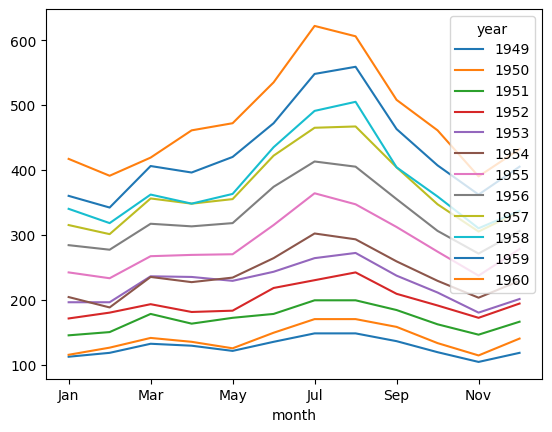

In [95]:
df_flights.pivot(index='month', columns='year', values='passengers').plot()

<br>

---
# Combining DataFrames

Common ways of combining tables include

- appending (or concatenating) where we stack one dataset below the other making a longer dataset
- merging (or joining) where we combine tables on a common variable making a wider dataset


![](./images/sql.jpg)


## Merge

`pandas.merge` is similar to the _SQL join_ operations. It links rows of tables using one or more _keys_. The following graphic outlines the specifics of common SQL join operations.

**Syntax**

```python
pd.merge(df1, df2, how='left', on='key', 
         left_on=None, right_on=None, 
         left_index=False, right_index=False, 
         sort=True, copy=True,
         suffixes=('x', 'y'))
```

The syntax includes specifications of the following arguments

* **Which column to merge on;** 
    * the `on='key'` if the same key is present in the two DFs, 
    * or `left_on='lkey', right_on='rkey'` if the keys have different names in the DFs 
    * [*Note*] To merge on multiple keys, pass a *list of column names*


* **The nature of the join;** 
    * the `how=` option, with `left`, `right`, `outer`
    * By default, the merge is an `inner` join

* Tuple of string values to append to **overlapping column names** to identify them in the merged dataset
    * the `suffixes=` option
    * defaults to `('_x', '_y')`

* If you wish **to merge on the index**, pass `left_index=True` or `right_index=True` or both.


* Sort the result DataFrame by the join keys in lexicographical order or not;
    * `sort=` option; 
    * Defaults to `True`, setting to `False` will improve performance substantially in many cases

<br>

---
### Default Merge and Inner Join

Here default implies that no other instructions are provided than the names of the table.
Pandas assumes that you want to perform an intersection.

Merge happens on the column '*key*' which is common to both datasets.
Note that if there are no matching column names in the two DataFrames to merge on, the *default merge* will throw an error.

```python
# inner join
pd.merge(df0, df2)
```

Note that we could've written 

```python
pd.merge(df0, df2, on='key', how='inner') 
```
to achieve the same effect.

<br>

---
### Outer Join

This leads to a **union** of keys, missing values are imputed in the resulting dataset wherever a match isn't found in either table.

```python
pd.merge(df0, df2, how='outer')
```

<br>

---
### Left Join

As expected, this will retain everything from `df1` and only matching rows from `df2`

```python
pd.merge(df1, df2, how='left')
```

<br>

---
### Primary Keys with different names

The `left_on=` and `right_on=` options save us from having to rename columns before merge.

```python
pd.merge(df1, df4, left_on='key', right_on='rkey')
```
<br>

---
### Primary Key is the Index

The pandas `merge` is so flexible that even if the *key* is the index in one or both DataFrames, the user wouldn't have to convert them into columns before the merge.

```python
# Set lkey to be the index of df3
df3.set_index('lkey', inplace=True)

# We specify that for the left df we will use the column called 'key' and for the right df, we will use its index for the merge
pd.merge(df2, df3, how='left', left_on='key', right_index=True)
```

**Combining DataFrames practice**

In [97]:
import numpy as np

In [103]:
df0 = pd.DataFrame({'lkey': ['a', 'b', 'c', 'd', 'e'],  
                 'data0': np.random.randint(0, 100, 5)})
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],  
                 'data1': np.random.randint(0, 100, 7)})
df2 = pd.DataFrame({'rkey': ['a', 'b', 'd', 'f', 'g'],  
                 'data2': np.random.randint(0, 100, 5)})
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],  
                 'data3': np.random.randint(0, 100, 7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],  
                 'data4': np.random.randint(0, 100, 3)})

In [104]:
display(df0, df2)

,lkey,data0
0,a,31
1,b,47
2,c,75
3,d,87
4,e,26


,rkey,data2
0,a,8
1,b,62
2,d,0
3,f,71
4,g,76


In [107]:
pd.merge(left=df0, right=df2, how='right', left_on='lkey', right_on='rkey')

,lkey,data0,rkey,data2
0,a,31.0,a,8
1,b,47.0,b,62
2,d,87.0,d,0
3,NaN,NaN,f,71
4,NaN,NaN,g,76


<br>

---
## join

`.join()` is a convenient **DataFrame method** for combining many DataFrames objects with the same or similar indexes but (non-overlapping) columns into a single result DataFrame.

* By default, the `join` method performs a _left join_ on the join keys.
* For simple **index-on-index merges** we can pass a list of DataFrames to `join.`

>  *The `join` operation is equivalent to performing a `reduce` on a list of DataFrames that have the same index.*

Syntax

```python
df1.join(df2)

# which is equivalent to
pd.merge(df1, df2, how='left', right_index=True, left_index=True)

# we can alter the nature of the join 
df1.join(df2, how='outer')
```

The real strength of the join method is apparent when we have multiple dataFrames. Then, instead of having to write a number of `merge` statements, we can get away with writing a single `join`.


```python
# Merging multiple DFs with the same index by passing a list of names to .join
df1.join([df2, df3, df4])
```

Since the default action is a `left join` we observe that all values of the index in `df1` are retained in the output, and missing values are imputed whereever no matching values are found. This action can be altered by passing the `how=` parameter.

In [108]:
df1

,key,data1
0,b,0
1,b,28
2,a,52
3,c,48
4,a,88
5,a,51
6,b,27


In [115]:
df3.set_index('lkey').join(df4.set_index('rkey'))

,data3,data4
lkey,,
b,73,80.0
b,89,80.0
a,57,80.0
c,42,NaN
a,40,80.0
a,90,80.0
b,15,80.0


In [112]:
df4.set_index('rkey')

,data4
rkey,
a,80
b,80
d,49


<br>

---
## concat

The `concat()` function in pandas is used to concatenate pandas objects along a particular axis. This operation is synonymous with  `binding, stacking, union, rbind, cbind` functions in other languages. 

Concatentation can happen along either axis, the action being governed by the `axis=` parameter.

* With `axis=0` the objects will be *appended vertically*, i.e. the resulting object will have more **rows**.<br> This is similar to the `rbind` operation in R and the `UNION` operation in SQL. <br>


* With `axis=1` the objects will be *concatenated horizontally*, leading to an object with more **columns**. <br>This is analogous to an `outer join`

Depending on whether the objects have overlapping index (or column) labels, the concat will also include merging of the data where an overlap is found.

**Syntax**

```python
pd.concat([list_of_series_or_dataframe_objects], axis=0_or_1)
```

In [123]:
# dummy data 
s1 = pd.Series(np.random.randn(3), index=list('abc'), name='series_1').round(2)
s2 = pd.Series(np.random.randn(4), index=list('defg'), name='series_2').round(2)
s3 = pd.Series(np.random.randn(2), index=list('hi'), name='series_3').round(2)
s4 = pd.Series(np.random.randn(5), index=list('abcde'), name='series_4').round(2)

In [124]:
display(s1, s2, s3, s4)

a    1.37
b    0.00
c    0.81
Name: series_1, dtype: float64

d    0.02
e    1.27
f   -1.77
g    0.17
Name: series_2, dtype: float64

h   -0.45
i   -0.52
Name: series_3, dtype: float64

a   -0.07
b    0.55
c   -0.87
d    0.87
e    0.88
Name: series_4, dtype: float64

In [125]:
# For `Series` objects with **no index overlap**
pd.concat([s1, s2, s3])

a    1.37
b    0.00
c    0.81
d    0.02
e    1.27
f   -1.77
g    0.17
h   -0.45
i   -0.52
dtype: float64

In [127]:
# with axis=1 will *merge* the Series to produce a DF (~full outer join)
pd.concat([s1, s2, s3, s4], axis=1).fillna('')

,series_1,series_2,series_3,series_4
a,1.37,,,-0.07
b,0.0,,,0.55
c,0.81,,,-0.87
d,,0.02,,0.87
e,,1.27,,0.88
f,,-1.77,,
g,,0.17,,
h,,,-0.45,
i,,,-0.52,


In [128]:
# concat with overlapping index (default join type is outer)
pd.concat([s1, s4], axis=1)

,series_1,series_4
a,1.37,-0.07
b,0.00,0.55
c,0.81,-0.87
d,NaN,0.87
e,NaN,0.88


In [129]:
# For `DataFrame` objects with no overlapping index,
# axis = 0 will produce an append
# axis = 1 will produce a merge, imputing NaN values where necessary

df1 = pd.DataFrame(np.random.randn(9).reshape(3, 3), 
                index=list('abc'), columns=list('XYZ')) 
df2 = pd.DataFrame(np.random.randn(6).reshape(3, 2), 
                index=list('pqc'), columns=list('XZ'))

display(df1)

,X,Y,Z
a,0.167322,0.024734,-0.292293
b,0.243603,-0.039221,0.045824
c,-1.804429,0.763583,0.398239


In [130]:
df2

,X,Z
p,1.133829,1.716924
q,0.331357,-0.259511
c,-0.677671,1.165010


In [131]:
pd.concat([df1, df2], axis=0)

,X,Y,Z
a,0.167322,0.024734,-0.292293
b,0.243603,-0.039221,0.045824
c,-1.804429,0.763583,0.398239
p,1.133829,NaN,1.716924
q,0.331357,NaN,-0.259511
c,-0.677671,NaN,1.165010


In [132]:
pd.concat([df1, df2], axis=1)

,X,Y,Z,X,Z
a,0.167322,0.024734,-0.292293,NaN,NaN
b,0.243603,-0.039221,0.045824,NaN,NaN
c,-1.804429,0.763583,0.398239,-0.677671,1.165010
p,NaN,NaN,NaN,1.133829,1.716924
q,NaN,NaN,NaN,0.331357,-0.259511


In [ ]:
!pwd

In [1]:
import pandas as pd

In [4]:
pd.read_csv("data/titanic.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
